In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import matplotlib.dates as mdates

In [3]:
df_airpods_review = pd.read_csv('data/AirPods Pro.csv')

In [4]:
df_airpods_review.head()

,Manufacturer,ProductName,review_rating,verified_purchase,review_date,review_title,review_text
0,Apple,AirPods Pro,5,0,2019-10-30,Airpods Pro deliver😎,This airpods pro do exactly what apple said th...
1,Apple,AirPods Pro,4,0,2019-10-30,List of Features/Changes compared to Airpods (v2),"Like iphone 11 Pro, Macbook Pro, Airpad Pro; t..."
2,Apple,AirPods Pro,3,0,2019-10-30,Cool but expensive,First review yeh heard about these excited but...
3,Apple,AirPods Pro,5,0,2019-10-30,Lit,They fire
4,Apple,AirPods Pro,5,1,2019-10-31,Saved my marriage,"With the new transparency mode, I can listen t..."


In [5]:
df_airpods_review['review_date'].min(), df_airpods_review['review_date'].max()

('2019-10-30', '2020-04-29')

In [6]:
df_airpods_review['review_date_key'] = pd.to_datetime(df_airpods_review['review_date']) - - pd.to_timedelta(1, unit='d')

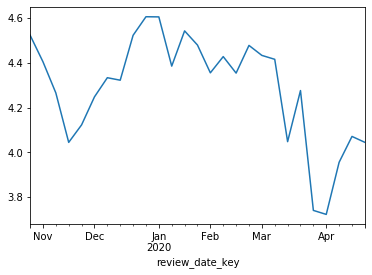

In [7]:
df_airpods_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].mean().plot()

In [8]:
df_airpods_review_weekly = df_airpods_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].agg(['mean', 'count']).reset_index()

In [9]:
df_airpods_review_weekly.head()

,review_date_key,mean,count
0,2019-10-27,4.523810,21
1,2019-11-03,4.404762,42
2,2019-11-10,4.265306,98
3,2019-11-17,4.043956,91
4,2019-11-24,4.122222,90


In [10]:
df_airpods_review_weekly.rename(columns={'mean':'average_rating', 'count':'review_count'}, inplace=True)

In [11]:
df_airpods_gg = pd.read_excel('data/Google Trend.xlsx', sheet_name = 'AirPds Pro')

In [12]:
df_airpods_gg.head()

,Week,"""Apple Airpods Pro"": (United States)"
0,2019-01-06,0
1,2019-01-13,0
2,2019-01-20,0
3,2019-01-27,0
4,2019-02-03,0


In [13]:
df_airpods_gg['week_key'] = pd.to_datetime(df_airpods_gg['Week'])

In [14]:
df_airpods_gg.rename(columns = {'"Apple Airpods Pro": (United States)':'trend_index'}, inplace = True)

In [15]:
df_airpods_gg.head()

,Week,trend_index,week_key
0,2019-01-06,0,2019-01-06
1,2019-01-13,0,2019-01-13
2,2019-01-20,0,2019-01-20
3,2019-01-27,0,2019-01-27
4,2019-02-03,0,2019-02-03


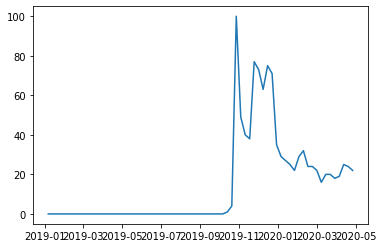

In [16]:
plt.plot(df_airpods_gg['week_key'], df_airpods_gg['trend_index'])

In [25]:
df_airpods_gg_filter = df_airpods_gg[df_airpods_gg['trend_index'].cumsum() > 0]

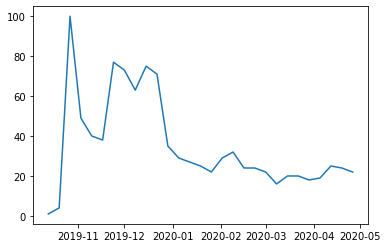

In [26]:
plt.plot(df_airpods_gg_filter['week_key'], df_airpods_gg_filter['trend_index'])

In [27]:
df_airpods = df_airpods_review_weekly.merge(df_airpods_gg_filter, left_on = 'review_date_key', right_on='week_key', how='right')

In [28]:
df_airpods.head()

,review_date_key,average_rating,review_count,Week,trend_index,week_key
0,2019-10-27,4.523810,21.0,2019-10-27,100,2019-10-27
1,2019-11-03,4.404762,42.0,2019-11-03,49,2019-11-03
2,2019-11-10,4.265306,98.0,2019-11-10,40,2019-11-10
3,2019-11-17,4.043956,91.0,2019-11-17,38,2019-11-17
4,2019-11-24,4.122222,90.0,2019-11-24,77,2019-11-24


In [29]:
df_airpods.sort_values('week_key',inplace=True)

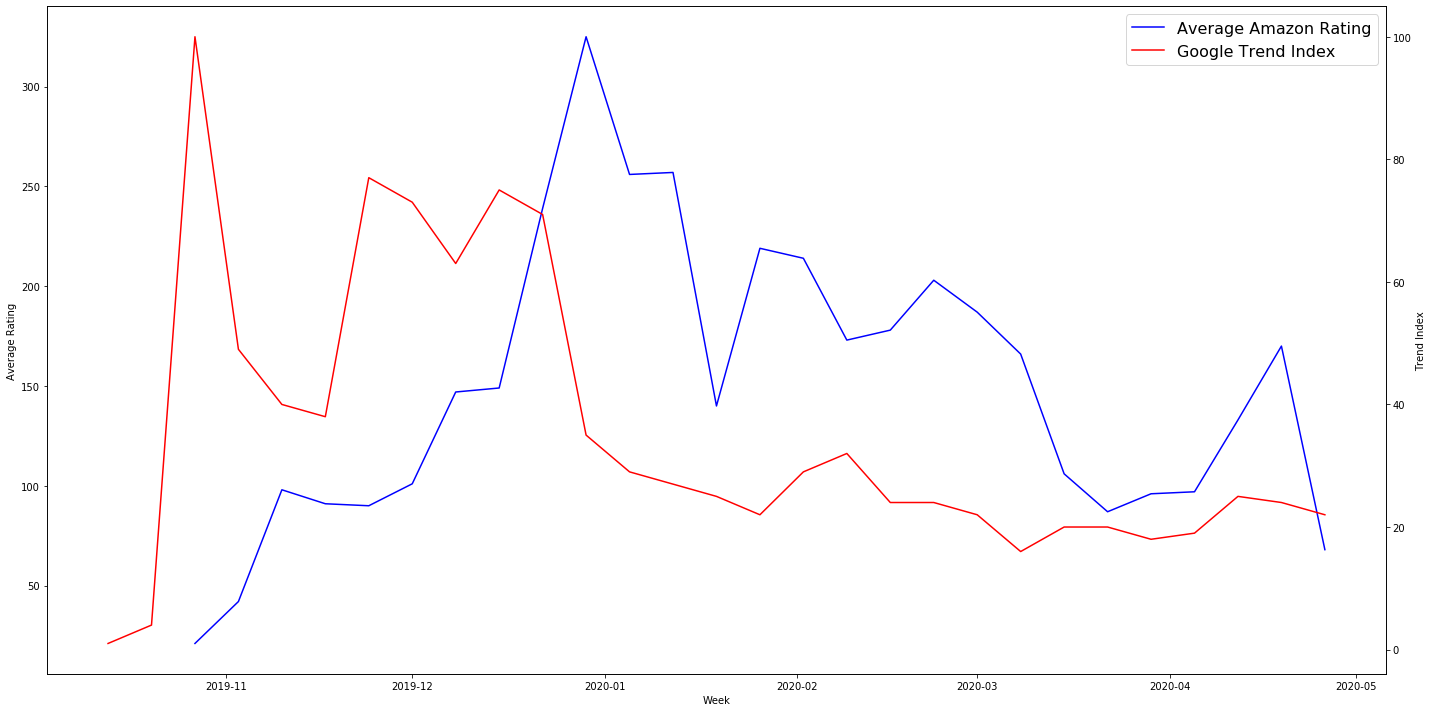

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

lns1 = ax.plot(df_airpods['week_key'], df_airpods['review_count'], '-b', label = 'Average Amazon Rating')
ax2 = ax.twinx()
lns2 = ax2.plot(df_airpods['week_key'], df_airpods['trend_index'],'-r', label = 'Google Trend Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, fontsize=16)

ax.set_xlabel("Week")
ax.set_ylabel("Average Rating")
ax2.set_ylabel("Trend Index")

fig.tight_layout()
plt.show()